# Damping Wing calculation


Adapted from the IDL routines of Tom Theuns

In [61]:
import numpy as np
import pylab as plt
import importlib

Some constants and units (physical and astrophysical)

In [62]:
Grav=6.673e-8      # Newton's gravity con
c=2.99792458e10    # speed of lights [cm/s]
m_H=1.67262158e-24 # proton mass; [g]
msun=1.989e33      # solar mass [g]
yr=3.1558e7        # yr [s]
Mpc=3.0856776e24   # Mpc in cm
km=1e5             # km in cm
lambdahi=1215.67   # Lyman-alpha wave length (Å)

Cosmology

In [63]:
OmegaM=0.31            # Omega matter
h=0.68                 # Hubble parameter in 100 km/s/Mpc
H0=100 * h * km / Mpc  # Hubble parameter in s^-1
Y=0.248                # Helium abundance (by mass)
rho_crit    = 3 * H0**2 / (8* np.pi * Grav) # critical density in g/cm^3
Omegab      = 0.0482519                     # baryon fraction
rho_bar     = Omegab * rho_crit             # baryon density
NHydrogen   = (1-Y) * rho_bar / m_H         # hydrogen number density at z=0 in cm^-3

Define the problem: redshift of quasar, number of bins, wave length range (in Å)

In [64]:
zqso=7.0
nbins=1000
lam_range=[-600,100]

Create the wave length, redshift, velocity and distance arrays

In [65]:
lam_qso=lambdahi * (1 + zqso) # Lyman-alpha wavelength at the quasar redshift
lambda_wl=lam_qso+lam_range[0]+np.arange(nbins)/(nbins-1)*(lam_range[1]-lam_range[0]) # wavelength array in Å
redshift=lambda_wl/lambdahi-1 # redshift array
veloc=c*(lambda_wl/lam_qso-1) # velocity array
HubbleZ=H0*np.sqrt(OmegaM*(1+zqso)**3+(1-OmegaM)) # H(z)
dist=veloc/HubbleZ # distance in pMpc

Calculate the density, velocities, temperatures and distances between cells.

In [66]:
dr1=np.diff(dist); dr=np.append(dr1,0)    # proper distance between two wavelength bins
nh       = NHydrogen * (1.+redshift)**3   # neutral density [particles / cm^3)
xvel_in  = veloc / km                     # velocity range [km/s]
xvel_out = xvel_in                        # velocity range [km/s]
temp     = 1e4*np.ones(veloc.size)        # IGM temperature [K}

Define neutral hydrogen fraction array

In [67]:
xHI      = np.zeros(veloc.size)

Toy problem: fully neutral away from the QSO, highly ionized in the near zone, completely ionized inside the quasar (redwards of Lyman-alpha

In [68]:
xHI[0:500]=1.; xHI[501:]=1e-7
red_indx = np.where(veloc > 0)
xHI[red_indx]=0 

Calculated the column densities of the cells and plot this

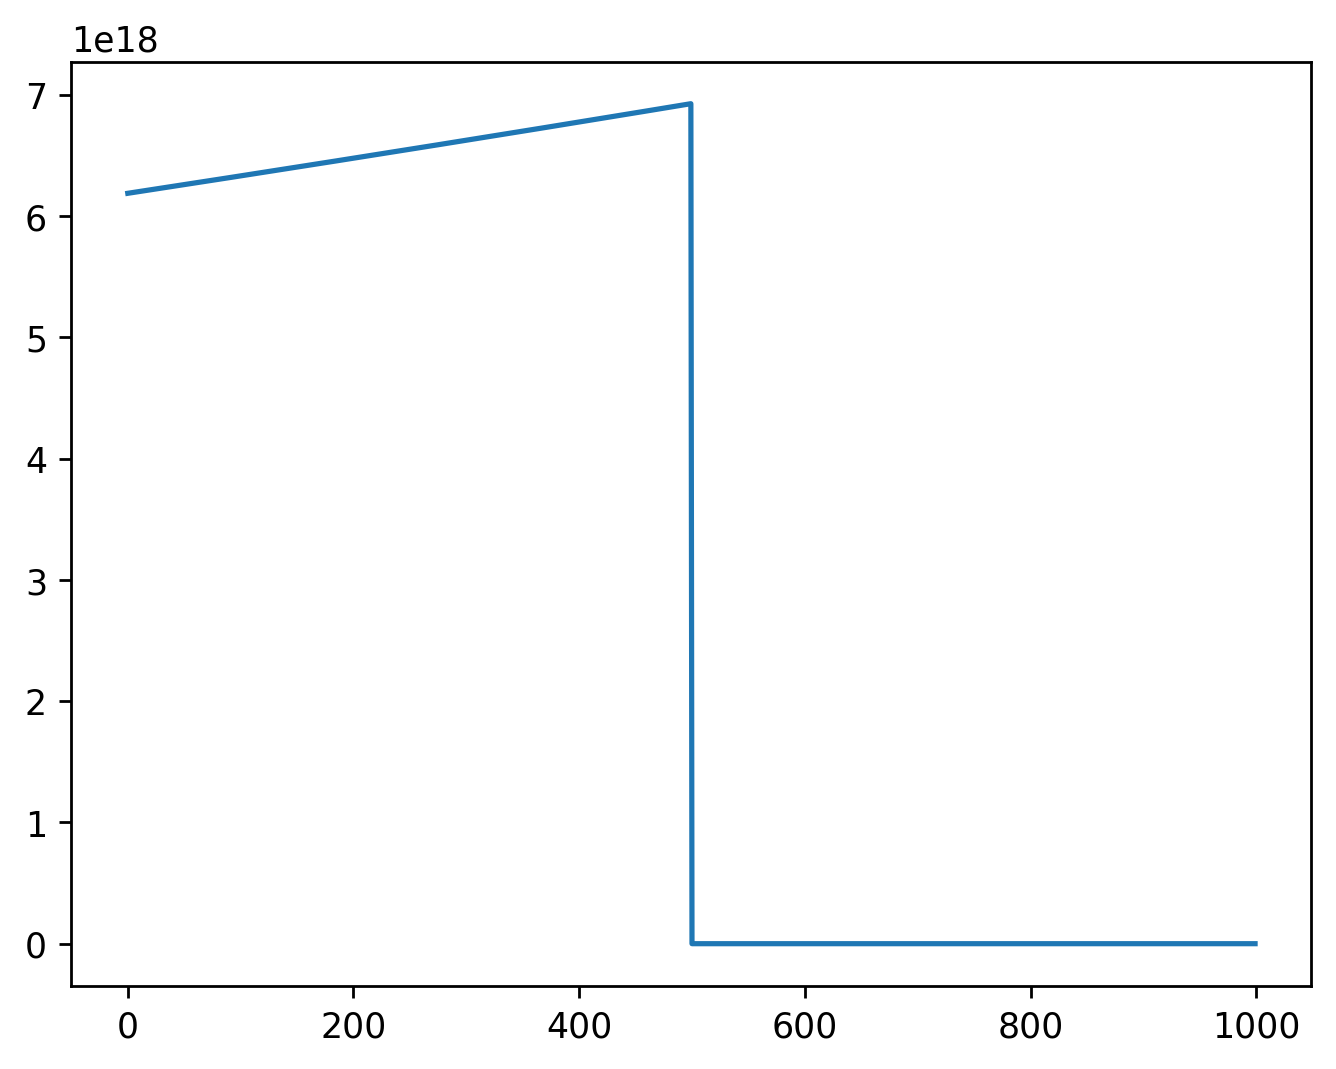

In [69]:
cdens    = nh * dr2 * xHI
plt.plot(cdens)

Import the function to calculate the optical depth at each wavelength

In [70]:
import compute_spectrum

Calculate the Lyman-alpha optical depth at each wavelength, both with and without the damping wing effect

In [71]:
tau_d = compute_spectrum.compute_spectrum(xvel_in,xvel_out,cdens,temp,lambdahi,0.4164,m_H,damped=True,periodic=False)
tau_nd = compute_spectrum.compute_spectrum(xvel_in,xvel_out,cdens,temp,lambdahi,0.4164,m_H,damped=False,periodic=False)

 including a damping wing


Plot the transmission curves

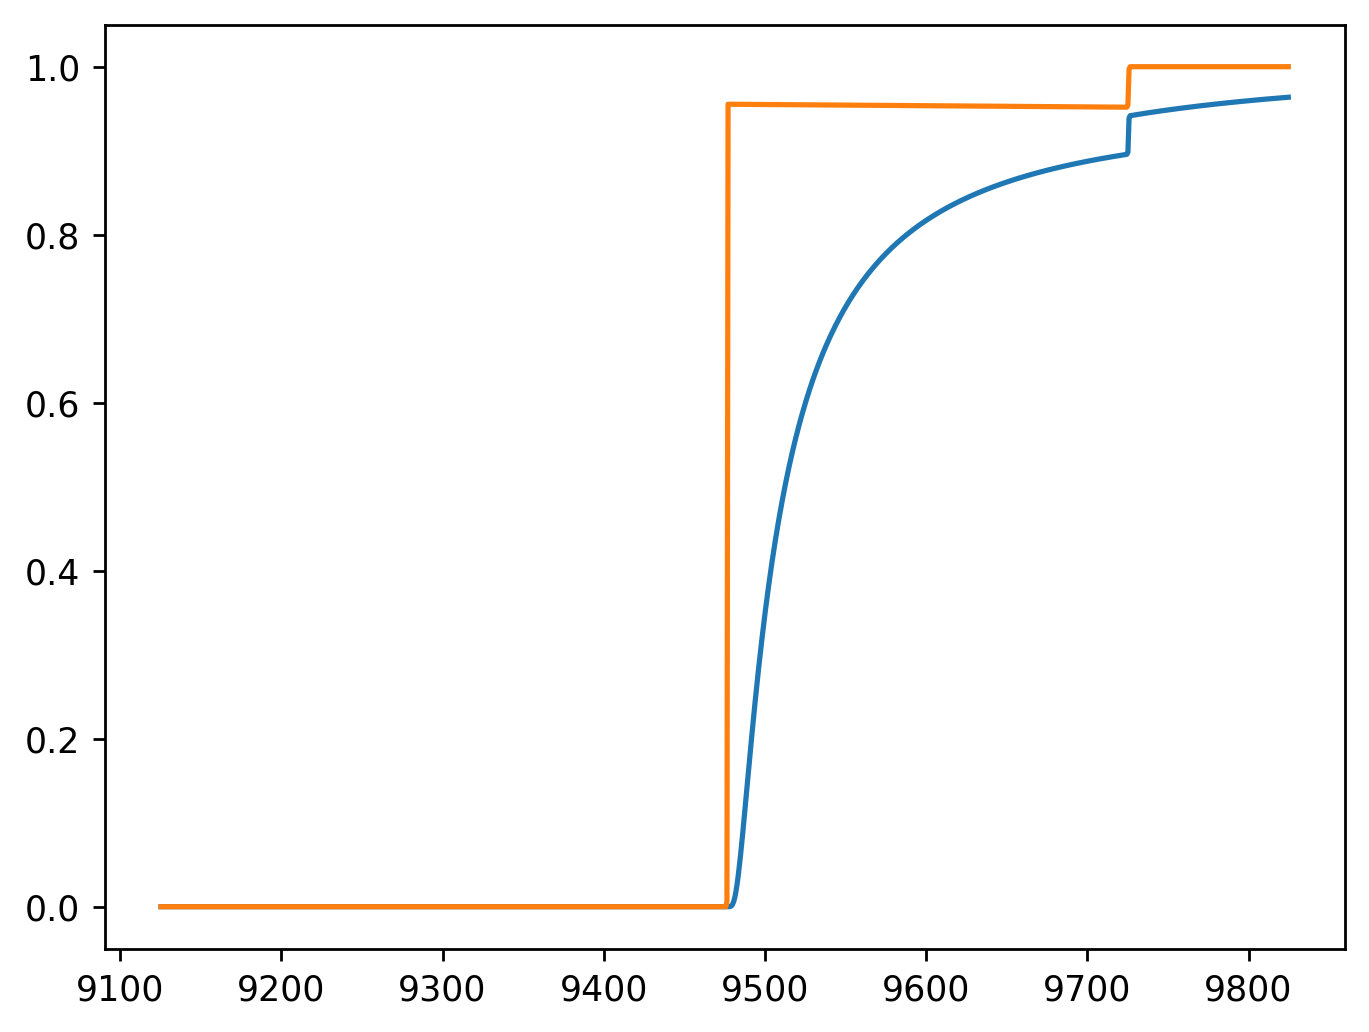

In [73]:
plt.plot(lambda_wl[:-1],np.exp(-tau_d[:-1]))
plt.plot(lambda_wl[:-1],np.exp(-tau_nd[:-1]))